In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [30]:
from keras.models import Sequential
from keras.layers import Dense

In [31]:
df = pd.read_csv("Data.csv")
print(df.columns)  # Check columns
df.columns = df.columns.str.strip()  # Clean column names
df = df.dropna(subset=['MEDV'])  # Drop rows with missing house prices
print(df.head())  # Preview the data

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [32]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [33]:
print(df.shape)


(506, 14)


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [35]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [36]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


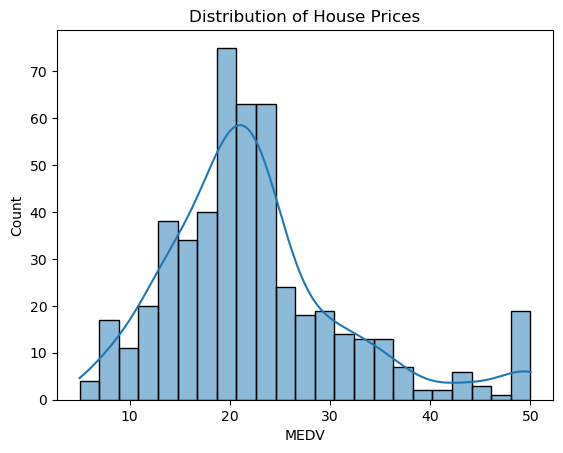

In [37]:
sns.histplot(df['MEDV'], kde=True)
plt.title("Distribution of House Prices")
plt.show()


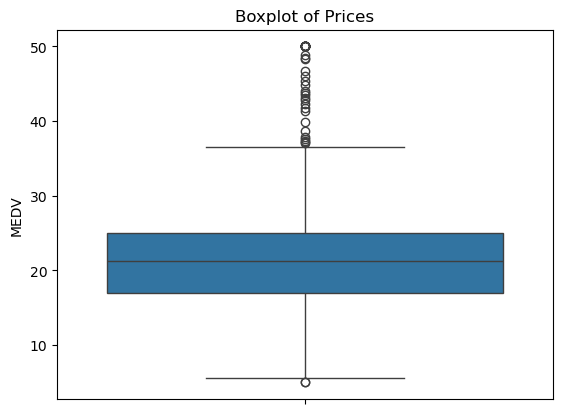

In [38]:
sns.boxplot(y=df['MEDV'])
plt.title("Boxplot of Prices")
plt.show()

In [39]:
correlation = df.corr()
print(correlation['MEDV'])

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


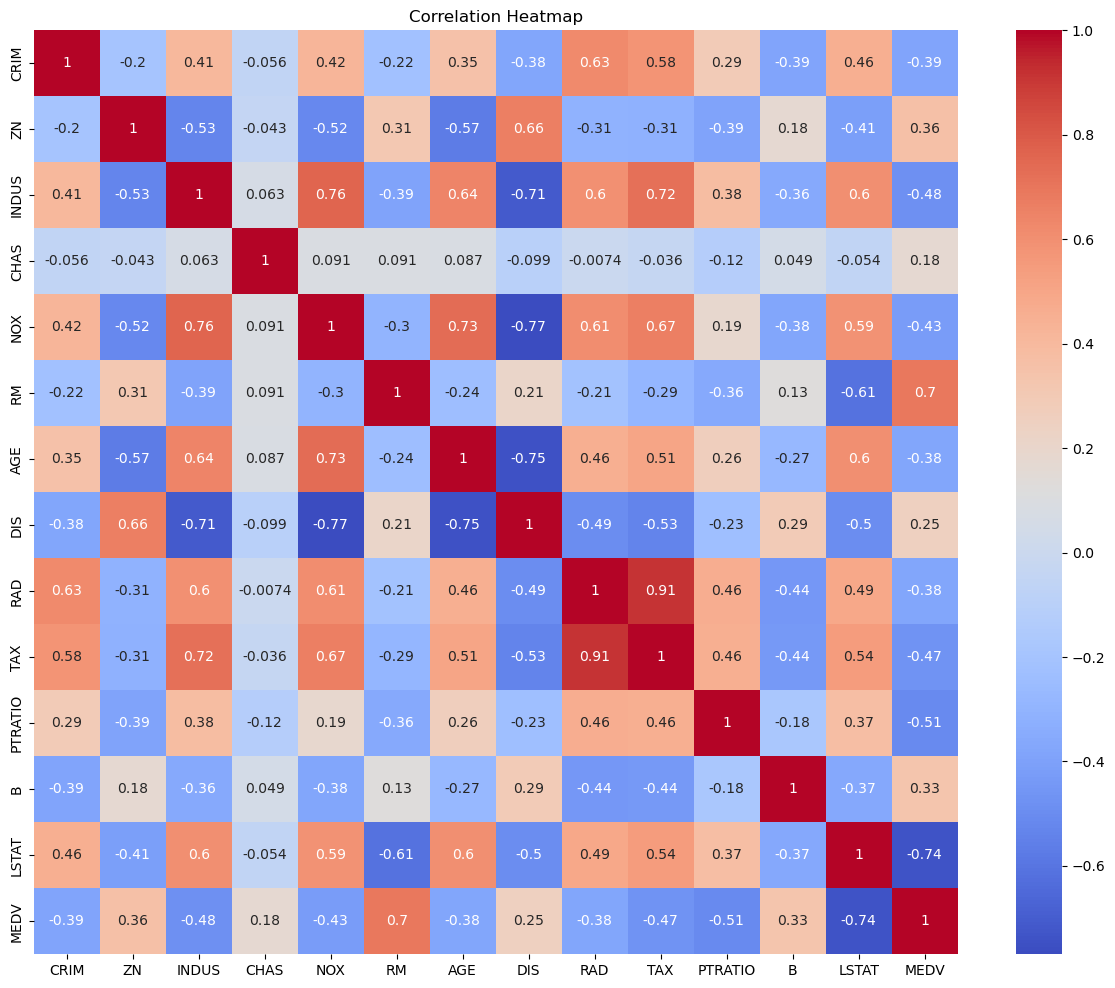

In [40]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, square=True, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

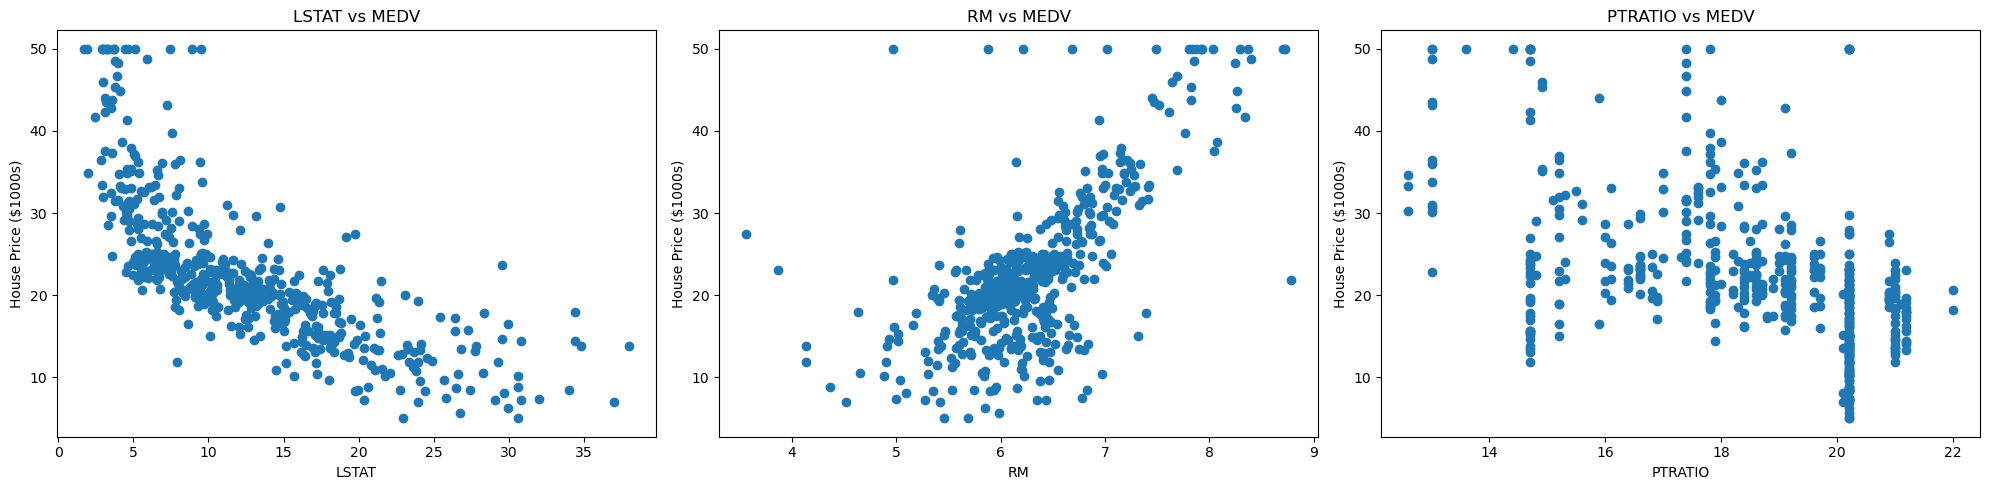

In [41]:
features = ['LSTAT', 'RM', 'PTRATIO']
plt.figure(figsize=(20, 5))
for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = df[col]
    y = df['MEDV']
    plt.scatter(x, y, marker='o')
    plt.title(f"{col} vs MEDV")
    plt.xlabel(col)
    plt.ylabel("House Price ($1000s)")
plt.tight_layout()
plt.show()

In [42]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [45]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [46]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


In [47]:
print("\nLinear Regression Results:")
print(f"  MSE: {mse_lr:.2f}")
print(f"  MAE: {mae_lr:.2f}")
print(f"  R² Score: {r2_lr:.4f}")
print(f"  RMSE: {np.sqrt(mse_lr):.4f}")


Linear Regression Results:
  MSE: 24.29
  MAE: 3.19
  R² Score: 0.6688
  RMSE: 4.9286


In [48]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

C:\Users\kaila\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [50]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose=0)


In [51]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print("\nNeural Network Results:")
print(f"  MSE: {mse_nn:.4f}")
print(f"  MAE: {mae_nn:.4f}")
print(f"  RMSE: {np.sqrt(mse_nn):.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.0859 - mae: 1.9694

Neural Network Results:
  MSE: 10.3974
  MAE: 2.1214
  RMSE: 3.2245


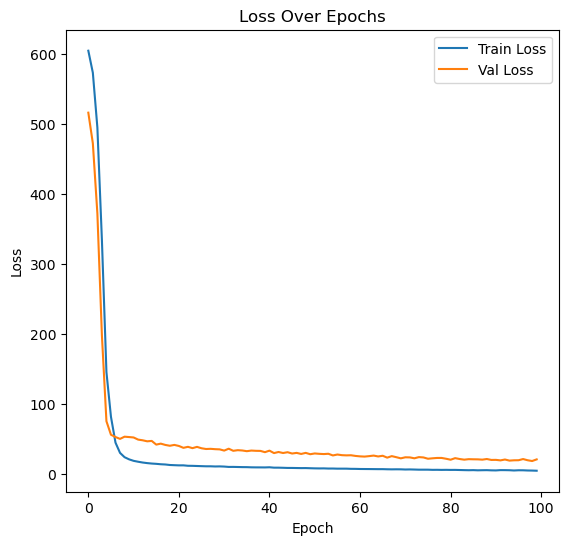

In [52]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

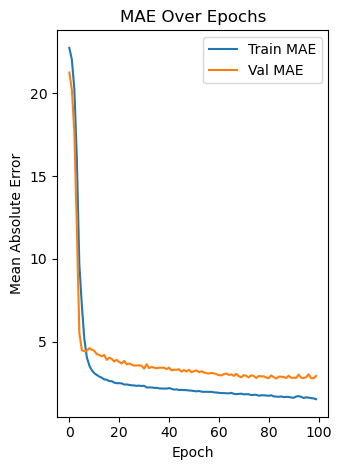

In [53]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
new_data = [[0.1, 10.0, 5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]]
new_data_scaled = sc.transform(new_data)
prediction = model.predict(new_data_scaled)
print("\nPredicted house price for new input:", prediction[0][0])

C:\Users\kaila\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step

Predicted house price for new input: 16.485102
